In [48]:
import pandas as pd
import numpy as np
from prophet import Prophet 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [49]:
df = pd.read_csv('city_weather_datasets/miami/miami.csv')
df = df.rename(columns={'timestamp': 'ds', 'temp': 'y'})
df['ds'] = pd.to_datetime(df['ds'], unit='s')

In [50]:
df[['ds', 'humidity']].corr()

,ds,humidity
ds,1.00000,0.09064
humidity,0.09064,1.00000


In [51]:
df[['ds', 'feels_like']].corr()

,ds,feels_like
ds,1.000000,0.443568
feels_like,0.443568,1.000000


In [52]:
df[['ds', 'wind_speed']].corr()

,ds,wind_speed
ds,1.000000,-0.033392
wind_speed,-0.033392,1.000000


22:19:06 - cmdstanpy - INFO - Chain [1] start processing
22:19:08 - cmdstanpy - INFO - Chain [1] done processing
/home/soloclimb/code/projects/Weather_Predictor/data_collection/virt/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Length of future: 5616
Length of df: 5623
Length of train: 5383
Length of test: 240


/home/soloclimb/code/projects/Weather_Predictor/data_collection/virt/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/soloclimb/code/projects/Weather_Predictor/data_collection/virt/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


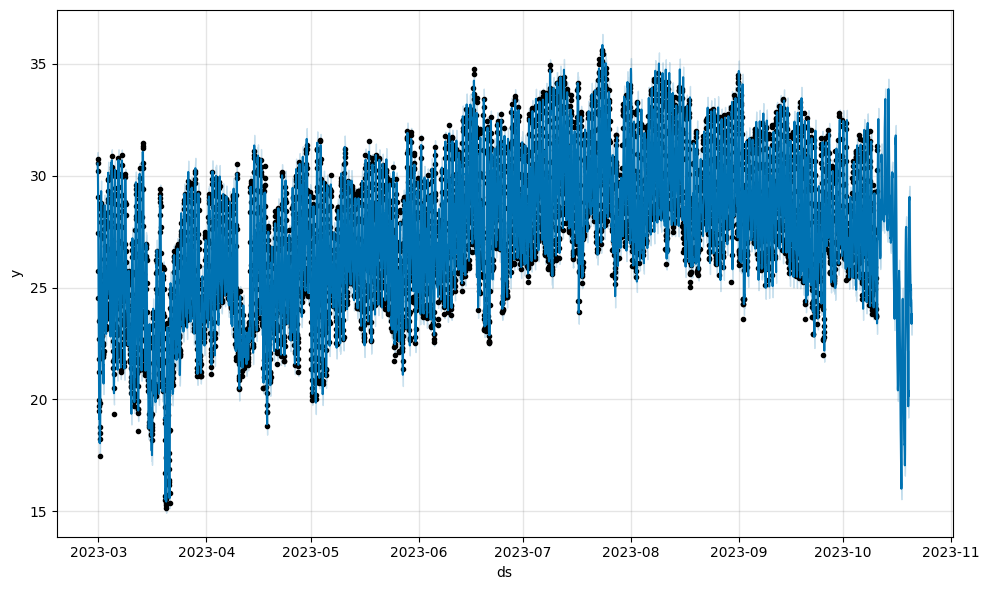

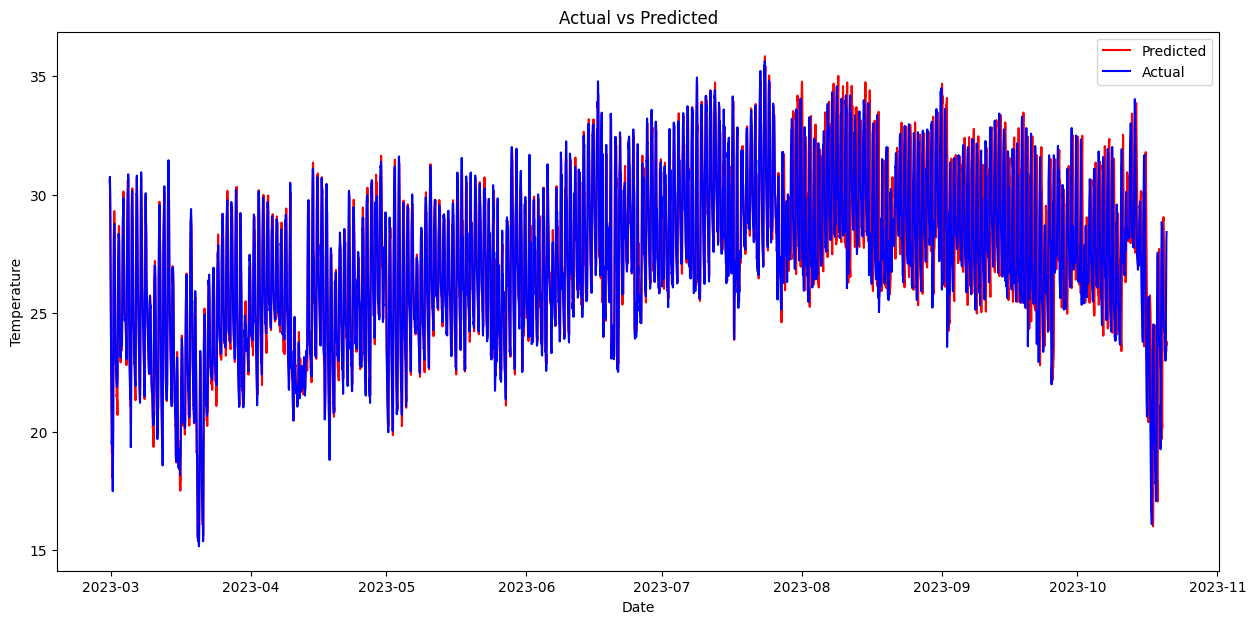

Mean Squared Error (MSE): 0.1501643446874923
Root Mean Squared Error (RMSE): 0.3875104446172932
Mean Absolute Error (MAE): 0.2694003179055306


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
train = df.iloc[:-240]
test = df.iloc[-240:]

model = Prophet(
    yearly_seasonality=False,  
    weekly_seasonality=False,  
)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  
model.add_regressor('wind_speed')
model.add_regressor('temp_min')
model.add_regressor('temp_max')
model.add_regressor('pressure') 
model.fit(train)

future = model.make_future_dataframe(periods=240, freq='H')  

print("Length of future:", len(future))
print("Length of df:", len(df))
print("Length of train:", len(train))
print("Length of test:", len(test))

future['wind_speed'] = df['wind_speed'].values[:5616]
future['pressure'] = df['pressure'].values[:5616]
future['temp_min'] = df['temp_min'].values[:5616]
future['temp_max'] = df['temp_max'].values[:5616]


forecast = model.predict(future)

fig = model.plot(forecast)
plt.figure(figsize=(15, 7))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

mse = mean_squared_error(df[:5616]['y'], forecast['yhat'])
print(f'Mean Squared Error (MSE): {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

mae = mean_absolute_error(df[:5616]['y'], forecast['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')


In [33]:
df[['ds', 'pressure']].corr()

,ds,pressure
ds,1.000000,-0.181393
pressure,-0.181393,1.000000


In [55]:
df = pd.read_csv('city_weather_datasets/miami/miami.csv')
df = df.rename(columns={'timestamp': 'ds', 'feels_like': 'y'})
df['ds'] = pd.to_datetime(df['ds'], unit='s')

In [56]:
df[['pressure', 'y']].corr()


,pressure,y
pressure,1.000000,-0.065334
y,-0.065334,1.000000


In [57]:
df[['temp', 'y']].corr()

,temp,y
temp,1.000000,0.970492
y,0.970492,1.000000


In [58]:
df[['humidity', 'y']].corr()

,humidity,y
humidity,1.000000,-0.380282
y,-0.380282,1.000000


In [59]:
df[['wind_speed', 'y']].corr()

,wind_speed,y
wind_speed,1.000000,0.241234
y,0.241234,1.000000


In [60]:
df[['clouds_coverage', 'y']].corr()

,clouds_coverage,y
clouds_coverage,1.000000,0.182952
y,0.182952,1.000000


22:29:22 - cmdstanpy - INFO - Chain [1] start processing
22:29:24 - cmdstanpy - INFO - Chain [1] done processing
/home/soloclimb/code/projects/Weather_Predictor/data_collection/virt/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Length of future: 5875
Length of df: 5882
Length of train: 5642
Length of test: 240


/home/soloclimb/code/projects/Weather_Predictor/data_collection/virt/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/soloclimb/code/projects/Weather_Predictor/data_collection/virt/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


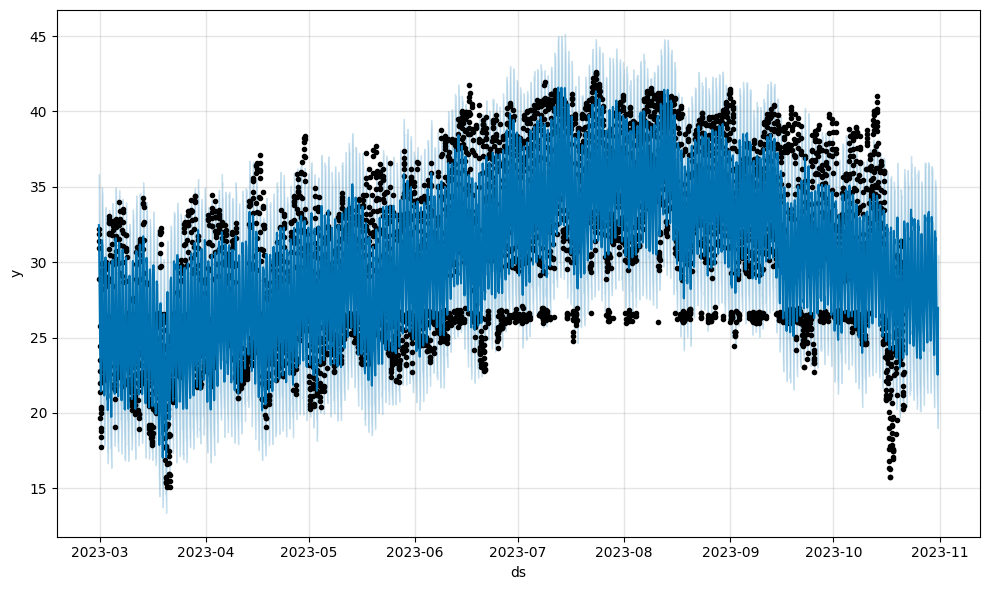

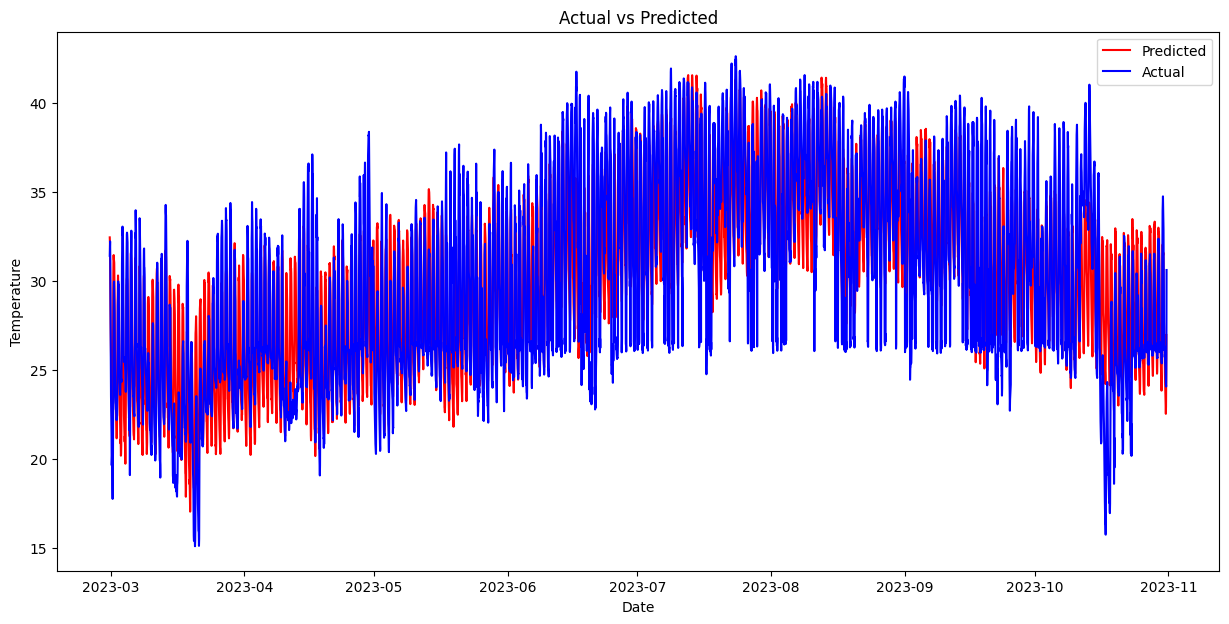

Mean Squared Error (MSE): 16.974356119724867
Root Mean Squared Error (RMSE): 4.11999467472045
Mean Absolute Error (MAE): 3.149151744870396


In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
train = df.iloc[:-240]
test = df.iloc[-240:]

model = Prophet(
    yearly_seasonality=False,  
    weekly_seasonality=False,  
)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  
model.add_regressor('wind_speed')
model.add_regressor('humidity')

model.add_regressor('clouds_coverage') 
model.fit(train)

future = model.make_future_dataframe(periods=240, freq='H')  

print("Length of future:", len(future))
print("Length of df:", len(df))
print("Length of train:", len(train))
print("Length of test:", len(test))

future['wind_speed'] = df['wind_speed'].values[:5875]
future['clouds_coverage'] = df['clouds_coverage'].values[:5875]
future['humidity'] = df['humidity'].values[:5875]



forecast = model.predict(future)

fig = model.plot(forecast)
plt.figure(figsize=(15, 7))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

mse = mean_squared_error(df[:5875]['y'], forecast['yhat'])
print(f'Mean Squared Error (MSE): {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

mae = mean_absolute_error(df[:5875]['y'], forecast['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')


In [73]:
df = pd.read_csv('city_weather_datasets/miami/miami.csv')
df = df.rename(columns={'timestamp': 'ds', 'wind_speed': 'y'})
df['ds'] = pd.to_datetime(df['ds'], unit='s')

23:07:32 - cmdstanpy - INFO - Chain [1] start processing
23:07:34 - cmdstanpy - INFO - Chain [1] done processing
/home/soloclimb/code/projects/Weather_Predictor/data_collection/virt/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Length of future: 7191
Length of df: 7198
Length of train: 6958
Length of test: 240


/home/soloclimb/code/projects/Weather_Predictor/data_collection/virt/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/soloclimb/code/projects/Weather_Predictor/data_collection/virt/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


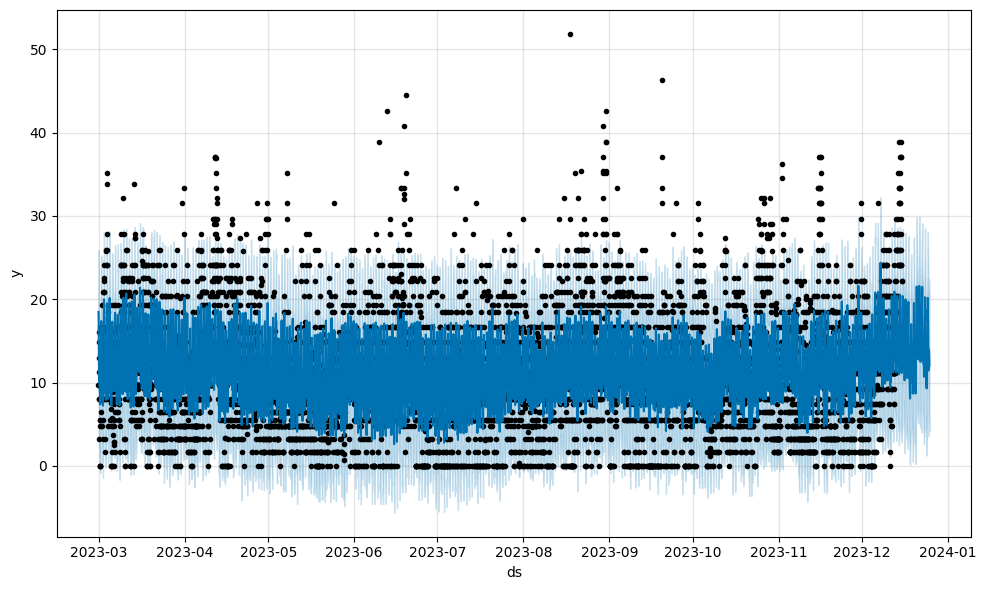

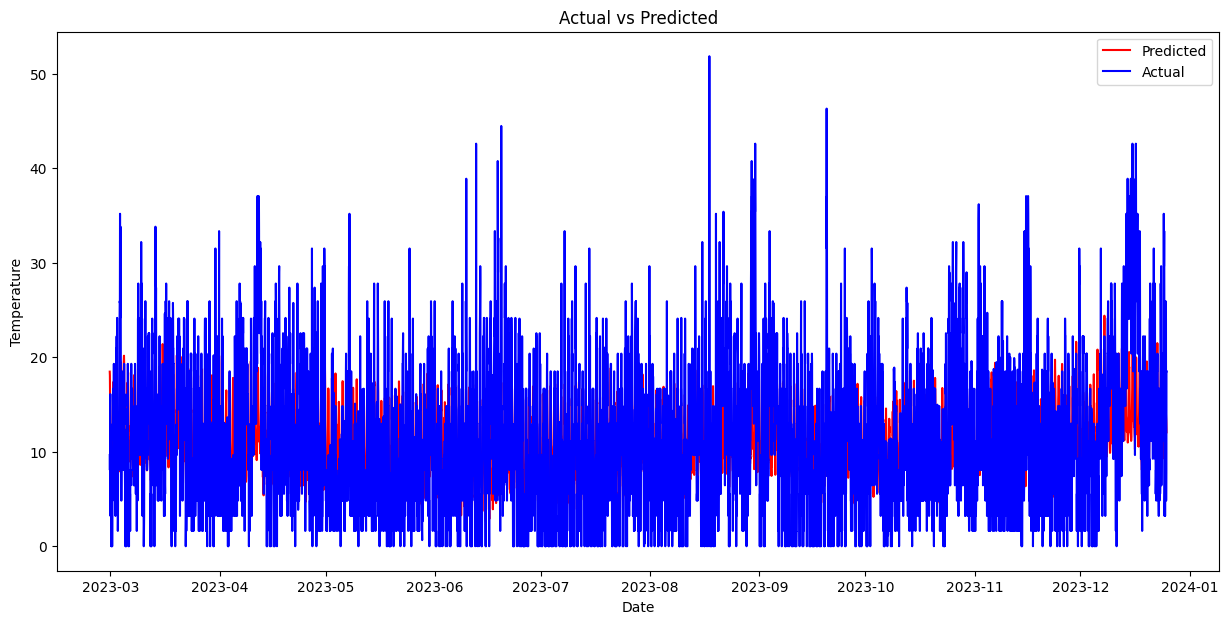

Mean Squared Error (MSE): 51.67628812017914
Root Mean Squared Error (RMSE): 7.18862212946119
Mean Absolute Error (MAE): 5.649724768219463


In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
train = df.iloc[:-240]
test = df.iloc[-240:]

model = Prophet(
    yearly_seasonality=False,  
    weekly_seasonality=False,  
)
model.add_seasonality(name='monthly', period=3, fourier_order=5)  

model.add_regressor('humidity')
model.add_regressor('feels_like')

model.add_regressor('clouds_coverage') 
model.fit(train)

future = model.make_future_dataframe(periods=240, freq='H')  

print("Length of future:", len(future))
print("Length of df:", len(df))
print("Length of train:", len(train))
print("Length of test:", len(test))

future['clouds_coverage'] = df['clouds_coverage'].values[:7191]
future['feels_like'] = df['feels_like'].values[:7191]
future['humidity'] = df['humidity'].values[:7191]




forecast = model.predict(future)

fig = model.plot(forecast)
plt.figure(figsize=(15, 7))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

mse = mean_squared_error(df[:7191]['y'], forecast['yhat'])
print(f'Mean Squared Error (MSE): {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

mae = mean_absolute_error(df[:7191]['y'], forecast['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')


In [92]:
df[['y', 'temp']].corr()

,y,temp
y,1.000000,0.127916
temp,0.127916,1.000000


In [120]:
df = pd.read_csv('city_weather_datasets/miami/miami.csv')
df = df.rename(columns={'timestamp': 'ds', 'pressure': 'y'})
df['ds'] = pd.to_datetime(df['ds'], unit='s')

23:28:25 - cmdstanpy - INFO - Chain [1] start processing
23:28:37 - cmdstanpy - INFO - Chain [1] done processing
/home/soloclimb/code/projects/Weather_Predictor/data_collection/virt/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


Length of future: 7323
Length of df: 7330
Length of train: 7090
Length of test: 240


/home/soloclimb/code/projects/Weather_Predictor/data_collection/virt/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/soloclimb/code/projects/Weather_Predictor/data_collection/virt/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


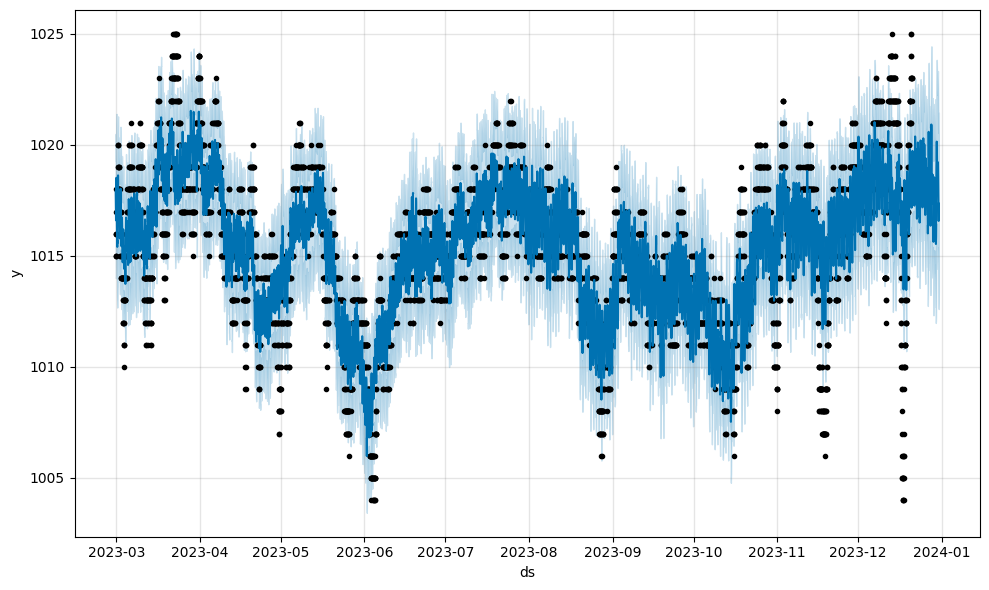

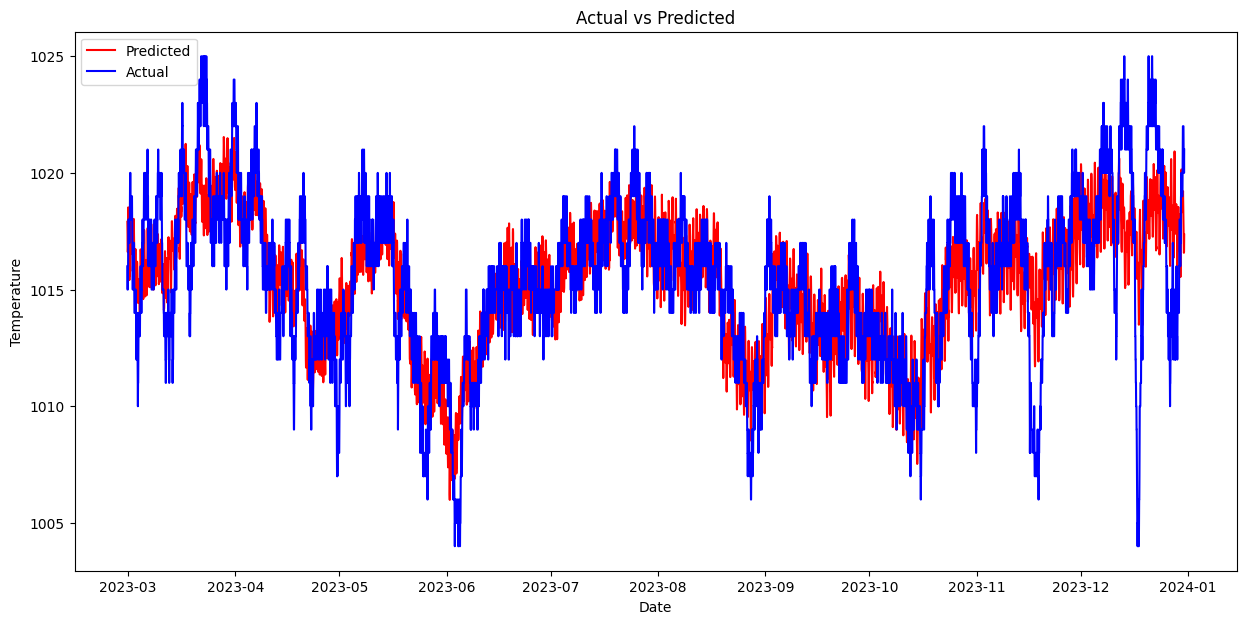

Mean Squared Error (MSE): 5.922529117428469
Root Mean Squared Error (RMSE): 2.433624687051902
Mean Absolute Error (MAE): 1.864361136158809


In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
train = df.iloc[:-240]
test = df.iloc[-240:]

model = Prophet(
    yearly_seasonality=False,  
    weekly_seasonality=False,  
)
model.add_seasonality(name='monthly', period=30, fourier_order=25)  
model.add_regressor('humidity')

model.fit(train)

future = model.make_future_dataframe(periods=240, freq='H')  

print("Length of future:", len(future))
print("Length of df:", len(df))
print("Length of train:", len(train))
print("Length of test:", len(test))

future['humidity'] = df['humidity'].values[:7323]




forecast = model.predict(future)

fig = model.plot(forecast)
plt.figure(figsize=(15, 7))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

mse = mean_squared_error(df[:7323]['y'], forecast['yhat'])
print(f'Mean Squared Error (MSE): {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

mae = mean_absolute_error(df[:7323]['y'], forecast['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')


In [110]:
df[['y', 'temp']].corr()

,y,temp
y,1.000000,-0.188821
temp,-0.188821,1.000000
